In [1]:
cd '/content/drive/My Drive/machine_learning_cl/Multi-label_classify_nn_regularization'

/content/drive/My Drive/machine_learning_cl/Multi-label_classify_nn_regularization


#Input Data

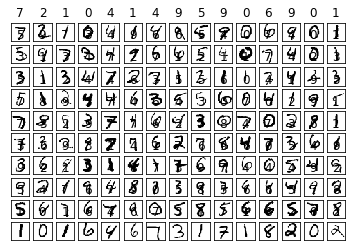

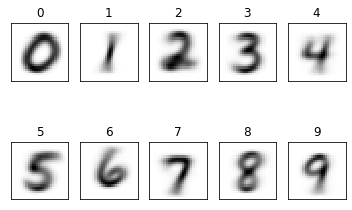

In [2]:
import matplotlib.pyplot as plt
import numpy as np

file_data   = "mnist.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

#
# make a matrix each column of which represents an images in a vector form
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector

    count += 1

#
# plot first 150 images out of 10,000 with their labels
#
f1 = plt.figure(1)

for i in range(150):

    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)


#plt.show()

#
# plot the average image of all the images for each digit
#
f2 = plt.figure(2)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

for i in range(num_image):

    im_average[:, list_label[i]] += list_image[:, i]
    im_count[list_label[i]] += 1

for i in range(10):

    im_average[:, i] /= im_count[i]

    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()


##Split data to (train images, train labels) and (test images, test labels)

In [0]:
numtrainimages = 1000
numtestimages = 9000
train_images  = np.empty((size_row * size_col, numtrainimages), dtype=float)
train_label  = np.empty(numtrainimages, dtype=int)
test_images  = np.empty((size_row * size_col, numtestimages), dtype=float)
test_label  = np.empty(numtestimages, dtype=int)

train_images = list_image[:, :numtrainimages]
train_label = list_label[:numtrainimages]
test_images = list_image[:, numtrainimages:]
test_label  = list_label[numtrainimages:]

# Neural Network Architecture

Object function \
$$
J(\theta)=\frac {1} {m} ​\sum_{i=1}^{m​}\sum_{k=0}^{k=9}​(−l_k^{(i)}​log(h_k^{(i)}​)−(1−l_k^{(i)}​)log(1−h_k{(i)}​)) + \frac {\lambda} {2n} \sum_{j=1}^{n}{ \theta_{j}^{2}} 
$$

Gradient Descent
$$
\theta_k^{t+1} := \Theta_k^{t}(1-\alpha \frac {\lambda} {m}) - \alpha \frac{∂J(\theta^{(t)})} {∂\theta_k} \ for \ all \ k
$$

$$
\frac {\partial \delta} {\partial W_{a,k}} = (\sigma(h_k) - l)* \tilde{z_a} \\ a = 1,,, 49 \ k = 1,,,10 \\
\frac {\partial \delta} {\partial V_{b,k}} = (\sigma(h) - l)* W_{b,k} * (\sigma(z_k)(1-\sigma(z_k)) * \tilde{y_b} \\ b = 1,,,196 \ k = 1,,,49 \\ 
\frac {\partial \delta} {\partial U_k} = (\sigma(h) - l)* W_1 * (\sigma(z_1)(1-\sigma(z_1))* V_1 * (\sigma(y_1))(1-\sigma(y_1)) * x_1 \\ c = 1,,,784 \ k = 1,,,196
$$

In [0]:
# create label for one hot encoding
def label(num):
  label = np.zeros(10, dtype=int)
  label[num] = 1
  return label

def labels():
  labels = np.zeros((10,10), dtype = int)
  for i in range(10):
    labels[i, :] = label(i)
  return labels

l = labels() #10X10


In [0]:
## NN architecture
numX = 784
numY = 196
numZ = 49
numH = 10

In [6]:
import pickle

#가장 처음 한 번만 실행
# initializing model parameters

"""
np.random.seed(seed=100) #랜덤값 고정
U = np.random.normal(size=numY*(numX+1)).reshape(numX+1, numY)
V = np.random.normal(size=numZ*(numY+1)).reshape(numY+1, numZ)
W = np.random.normal(size=numH*(numZ+1)).reshape(numZ+1, numH)
past_itr = 0

accuracy_array = np.zeros(past_itr)
cost_array = np.zeros(past_itr)

with open('practice_train_weights.p', 'wb') as file:
    pickle.dump(U, file)
    pickle.dump(V, file)
    pickle.dump(W, file)
    pickle.dump(past_itr, file)
    pickle.dump(accuracy_array, file)
    pickle.dump(cost_array, file)
 """

"\nnp.random.seed(seed=100) #랜덤값 고정\nU = np.random.normal(size=numY*(numX+1)).reshape(numX+1, numY)\nV = np.random.normal(size=numZ*(numY+1)).reshape(numY+1, numZ)\nW = np.random.normal(size=numH*(numZ+1)).reshape(numZ+1, numH)\npast_itr = 0\n\naccuracy_array = np.zeros(past_itr)\ncost_array = np.zeros(past_itr)\n\nwith open('practice_train_weights.p', 'wb') as file:\n    pickle.dump(U, file)\n    pickle.dump(V, file)\n    pickle.dump(W, file)\n    pickle.dump(past_itr, file)\n    pickle.dump(accuracy_array, file)\n    pickle.dump(cost_array, file)\n "

## model - forward and back propagation

In [0]:
#이미지 1개
from numba import jit
@jit(nopython=True, parallel=True)
def J(H, label): # 10*1 10*1
  cost = (-label)*(np.log(H)) 
  - (1-label)*(np.log(1-H))
  SUM = np.sum(cost)
  return SUM

In [0]:
from numba import jit
@jit(nopython=True)
def zeros(length):
    return np.zeros(length, np.float64)  # np.float64 instead of np.float

@jit(nopython=True)
def empty(size):
    return np.empty(size, np.float64)

@jit(nopython=True, parallel=True)
def sigma(X):
    return 1.0/(1.0+(np.exp(-X)))

@jit(nopython=True, parallel=True)
def sum_square(X):
    return np.square(X)

In [0]:
@jit(nopython=True, parallel=True)
def sum_square(X):
  acc = 0
  for val in X:
    val2 = np.square(val)
    acc += np.sum(val2)
  return acc

In [0]:
@jit(nopython=True)
def model(U, V, W, past_itr, numimages, accuracy_array_t, cost_array_t,image_vec, image_label):
  #gradient descent
  predicted_label = zeros(numimages)
  itr = 250
  lamb = 5

  ##코드를 여러번 돌릴 때마다 accuracy array와 cost array 길이 늘리기
  accuracy_array = zeros(past_itr+itr)
  accuracy_array[:past_itr] = accuracy_array_t[:past_itr]
  cost_array = zeros(past_itr+itr)
  cost_array[:past_itr] = cost_array_t[:past_itr]
  ln_rate = 0.05
  
  for j in range(itr):#iteration 
    j = past_itr + j  #cost와 accuracy array의 index
    errors = 0 
    ifzero = 1 
    if (j==0):
      ifzero = 0
    if (j%101==0):
      ln_rate = ln_rate * (0.002)
    print("iteration:", j+1)
    for i in range(numimages): #6000개의 데이터  # image n개 #forward propagation
      #print(i)
      X  = empty((size_row * size_col, 1))
      im_vec = np.ascontiguousarray(image_vec[:, i])
      X = im_vec.reshape(((size_row *  size_col), 1) )
      l_indx = image_label[i] #int 
      Xt_nob = np.transpose(X)

      #  print("Xt_nob : ", Xt_nob)
      X0 = np.array([1]) #bias
      X_b = np.append(im_vec, X0)
      Xt = X_b.reshape(1,size_row *  size_col+1) 
      #  print("Xt : ", Xt)
      Y = np.dot(Xt, U)

      #activation function
      ##sigma = lambda x: 1/(1+(np.exp(-x)))
      ##vsigma = np.vectorize(sigma)

      Y_tilda_nob = sigma(Y)
      #  print("Y_tilda_nob : ", Y_tilda_nob)
      Y0 = np.array([1])
      im_vec_y = np.ascontiguousarray(Y_tilda_nob[0, :])
      Y_tilda_b = np.append(im_vec_y, Y0)
      Y_tilda = Y_tilda_b.reshape(1,numY+1)
      #  print("Y_tilda : ", Y_tilda)

      Z = np.dot(Y_tilda, V)
      Z_tilda_nob = sigma(Z)
      #  print("Z_tilda_nob : ", Z_tilda_nob)

      Z0 = np.array([1])
      im_vec_z = np.ascontiguousarray(Z_tilda_nob[0, :])
      Z_tilda_b = np.append(im_vec_z, Z0)
      Z_tilda = Z_tilda_b.reshape(1,numZ+1)
      #  print("Z_tilda : ", Z_tilda)
      H = np.dot(Z_tilda, W)
      H_tilda = sigma(H)
      #  print("H_tilda : ", H_tilda)

      onehotencd = l[l_indx]

      ##error
      error = J(H_tilda, onehotencd)
      predicted_label[i] = np.argmax(H_tilda)
      errors += error
      #print(" error : ", error)
      #print(" predicted_label[i]", predicted_label[i])
      #print(" train_label", train_label[i])

      ##back propagation
      
      #print("W : ", W)
      ## W - 업데이트 49 X 10 - no bias 50*10 #Ztilda는 49개의 w 업데이트의 과정에서 고정
      Z_tilda_nob = Z_tilda_nob.reshape(49,1)
      redundant = (H_tilda - onehotencd).reshape(1,10 ) #1x10
      if(j== 0): 
        W[:49, :] = W[:49, :]- ln_rate * np.dot(Z_tilda_nob, redundant)
      W[:49, :] = W[:49, :]*(1-ln_rate*lamb/numimages)- ln_rate * np.dot(Z_tilda_nob, redundant) # 49x10
      # 49X10 - 상수 * (49X1)(1X10).
      # 50X10 - 상수 * (49X1)(1X10).
      #print(W.shape)

      ## V - 업데이트 196X49 197*
      z = sigma(Z)*(1-sigma(Z))
      Y_tilda_nob = Y_tilda_nob.reshape(196,1)
      w = np.ascontiguousarray(W[:49, :])
      a = np.dot(redundant, w.reshape(10,49))
      b = z
      redundant2 = (a*b) 
      if(j== 0):
        V[:196, :] = (V[:196, :] - ln_rate * np.dot(Y_tilda_nob, redundant2))              
      V[:196, :] = (V[:196, :]*(1-ln_rate*lamb/numimages) - ln_rate * np.dot(Y_tilda_nob, redundant2))                     #196X49
      #print(V.shape)
      
      ## U - 업데이트 784X49
      y = sigma(Y)*(1-sigma(Y))
      Xt_nob = Xt_nob.reshape(784,1)
      v =  np.ascontiguousarray(V[:196, :])
      c = np.dot(redundant2, v.reshape(49,196))
      d = y
      redundant3 = (c*d)          #1x196
      if(j== 0):
        U[:784, :] = (U[:784, :] - ln_rate * np.dot(Xt_nob,redundant3))
      U[:784, :] = (U[:784, :]*(1-ln_rate*lamb/numimages) - ln_rate * np.dot(Xt_nob,redundant3))
      #print("U : ", U.shape)

    cost = errors/numimages + ifzero * (lamb/(2*numimages))*sum_square((im_vec,im_vec_y,im_vec_z))
    ## accuracy
    ## check if the prediction is correct
    count = 0
    for real, hypo in zip(image_label, predicted_label):
        if real == hypo:
          count = count + 1
      
    accuracy = count/numimages
      
    print("cost ", cost)
    print("accuracy ", accuracy)
    accuracy_array[j] = accuracy 
    
    cost_array[j] = cost

  past_itr = j + 1
  return U,V,W,past_itr,accuracy_array,cost_array,predicted_label


In [0]:
import pickle
with open('practice_train_weights.p', 'rb') as file:    # weights.p 파일을 바이너리 읽기 모드(rb)로 열기
    U = pickle.load(file)
    V = pickle.load(file)
    W = pickle.load(file)
    past_itr = pickle.load(file)
    accuracy_array_t = pickle.load(file)
    cost_array_t = pickle.load(file)

In [15]:
print(past_itr)

200


#Learning training data

In [16]:
U,V,W,training_itr,accuracy_array,cost_array,predicted_label_train=model(U, V, W, past_itr, numtrainimages, accuracy_array_t, cost_array_t,train_images, train_label)

iteration: 201
cost  0.8979907767647197
accuracy  0.9
iteration: 202
cost  0.8985605963757686
accuracy  0.9
iteration: 203
cost  0.8631279889095216
accuracy  0.907
iteration: 204
cost  0.860386093681429
accuracy  0.91
iteration: 205
cost  0.8582242090430705
accuracy  0.91
iteration: 206
cost  0.8564911387192709
accuracy  0.916
iteration: 207
cost  0.8550773948401764
accuracy  0.919
iteration: 208
cost  0.8539034881161285
accuracy  0.923
iteration: 209
cost  0.8529115643418121
accuracy  0.928
iteration: 210
cost  0.8520594058474099
accuracy  0.929
iteration: 211
cost  0.8513161142544393
accuracy  0.928
iteration: 212
cost  0.8506589946506073
accuracy  0.928
iteration: 213
cost  0.8500713020201547
accuracy  0.928
iteration: 214
cost  0.8495406087811617
accuracy  0.927
iteration: 215
cost  0.849057621073048
accuracy  0.928
iteration: 216
cost  0.8486153200477689
accuracy  0.928
iteration: 217
cost  0.848208338974192
accuracy  0.928
iteration: 218
cost  0.8478325116605319
accuracy  0.925
i

In [0]:
with open('practice_train_weights.p', 'wb') as file:    # james.p 파일을 바이너리 쓰기 모드(wb)로 열기
  pickle.dump(U, file)
  pickle.dump(V, file)
  pickle.dump(W, file)
  pickle.dump(training_itr, file)
  pickle.dump(accuracy_array,file)
  pickle.dump(cost_array,file)

In [24]:
print(training_itr)

250


#Learn test data

In [0]:
import pickle
## train한 weight를 받아옴
with open('practice_train_weights.p', 'rb') as file:    # weights.p 파일을 바이너리 읽기 모드(rb)로 열기
    U = pickle.load(file)
    V = pickle.load(file)
    W = pickle.load(file)
    past_itr = pickle.load(file)
    accuracy_array_t = pickle.load(file)
    cost_array_t = pickle.load(file)


In [0]:
training_itr = past_itr
accuracy_array = accuracy_array_t
cost_array = cost_array_t

In [0]:
with open('testing_weights.p', 'rb') as file:    # weights.p 파일을 바이너리 읽기 모드(rb)로 열기
    U = pickle.load(file)
    V = pickle.load(file)
    W = pickle.load(file)
    past_itr = pickle.load(file)
    accuracy_array_t = pickle.load(file)
    cost_array_t = pickle.load(file)

In [0]:
past_itr = 0

In [14]:
U_t,V_t,W_t,testing_itr,accuracy_array_test,cost_array_test,predicted_label=model(U, V, W, past_itr, numtestimages, accuracy_array_t, cost_array_t,test_images, test_label)

iteration: 1
cost  0.6804473626570257
accuracy  0.857
iteration: 2
cost  0.7341301076645683
accuracy  0.857
iteration: 3
cost  0.7276891706003086
accuracy  0.8603333333333333
iteration: 4
cost  0.7219248012018636
accuracy  0.8617777777777778
iteration: 5
cost  0.7164308172733805
accuracy  0.8631111111111112
iteration: 6
cost  0.7111774954195007
accuracy  0.8646666666666667
iteration: 7
cost  0.7061491564066058
accuracy  0.8656666666666667
iteration: 8
cost  0.7013288878734836
accuracy  0.866
iteration: 9
cost  0.6967005422293568
accuracy  0.8667777777777778
iteration: 10
cost  0.6922494856786882
accuracy  0.8681111111111111
iteration: 11
cost  0.6879626192110476
accuracy  0.8692222222222222
iteration: 12
cost  0.6838282203862387
accuracy  0.8695555555555555
iteration: 13
cost  0.6798357688158181
accuracy  0.8703333333333333
iteration: 14
cost  0.6759757910900666
accuracy  0.8708888888888889
iteration: 15
cost  0.6722397288240605
accuracy  0.8717777777777778
iteration: 16
cost  0.668619

In [0]:
with open('testing_weights.p', 'wb') as file:    # james.p 파일을 바이너리 쓰기 모드(wb)로 열기
    pickle.dump(U, file)
    pickle.dump(V, file)
    pickle.dump(W, file)
    pickle.dump(past_itr, file)
    pickle.dump(accuracy_array_test,file)
    pickle.dump(cost_array_test,file)

##Plot the training error & testing error

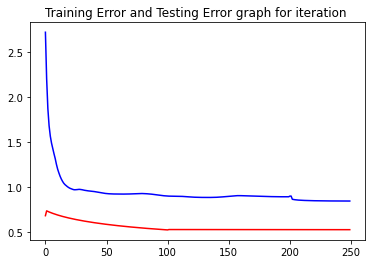

In [20]:
#J(th0, th1, th2, th3, th4, x, y)
plt.title("Training Error and Testing Error graph for iteration ")
plt.plot(range(training_itr), np.array(cost_array), color = 'blue' )
plt.plot(range(testing_itr), np.array(cost_array_test), color = 'red' )

plt.show()


##Plot the training & testing accuracy

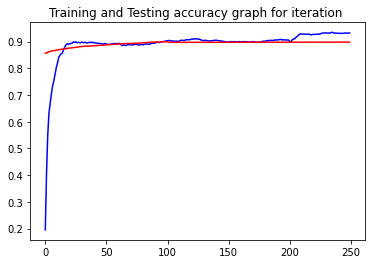

In [22]:
plt.title("Training and Testing accuracy graph for iteration ")
plt.plot(range(training_itr), np.array(accuracy_array), color = 'blue' )
plt.plot(range(testing_itr), np.array(accuracy_array_test), color = 'red' )

plt.show()

##write down the final training accuracy

In [23]:
print("final training accurary : {}%".format(round(accuracy_array[training_itr-1], 3)*100))

final training accurary : 93.2%


##write down the final testing accuracy

In [25]:
print("final testing accurary : {}%".format(round(accuracy_array_test[testing_itr-1], 3)*100))

final testing accurary : 89.8%


##the classification example

In [0]:
correct_vector = np.zeros((size_row*size_col,10))
wrong_vector  = np.zeros((size_row*size_col,10))

indx = 0 #loop variable
ccount = 0 
wcount = 0 

for real, hypo in zip(test_label, predicted_label[:9000]):
  if ccount < 10 :
    if real == hypo:
      correct_vector[:,ccount] = test_images[:, indx]
      ccount += 1
  if wcount < 10:
    if real != hypo:
      wrong_vector[:,wcount] = test_images[:, indx]
      wcount += 1
  else: break
  indx = indx+1

##correct images

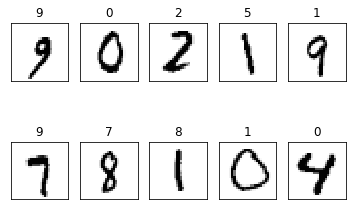

In [27]:
f3 = plt.figure(1)
for i in range(10):
  correct_matrix = correct_vector[:, i].reshape(size_row, size_col)

  plt.subplot(2, 5, i+1) # subplot(nrows, ncols, index, **kwargs)
  plt.title(test_label[i])
  plt.imshow(correct_matrix, cmap='Greys', interpolation='None') 
  frame   = plt.gca()
  frame.axes.get_xaxis().set_visible(False)
  frame.axes.get_yaxis().set_visible(False)

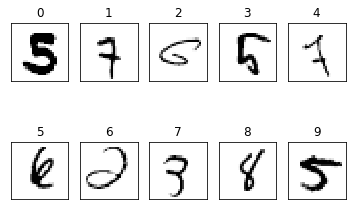

In [28]:
f4 = plt.figure(1)
for i in range(10):
  wrong_matrix = wrong_vector[:, i].reshape(size_row, size_col)

  plt.subplot(2, 5, i+1) # subplot(nrows, ncols, index, **kwargs)
  plt.title(i)
  plt.imshow(wrong_matrix, cmap='Greys', interpolation='None') 
  frame   = plt.gca()
  frame.axes.get_xaxis().set_visible(False)
  frame.axes.get_yaxis().set_visible(False)